In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set plot params
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

# Task 1 - Compute energy to volume relation

The lattice parameter that yields the lowest energy is: 4.031 Å.


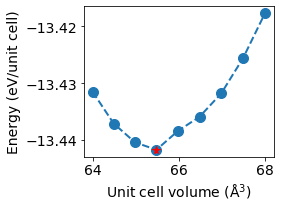

In [131]:
# Load data
data = np.loadtxt("datafiles/energy_to_volume.dat")

# Define figure
fig, ax = plt.subplots(figsize=(4,3))

# Plot
ax.plot(data[:,0], data[:,1], c='C0', linestyle='--', marker='o', linewidth=2, markersize=10)
ax.plot(data[3,0], data[3,1], marker='*', color='r', markersize=8)
ax.set_xlabel(r'Unit cell volume (Å$^3$)')
ax.set_ylabel('Energy (eV/unit cell)')
print(f'The lattice parameter that yields the lowest energy is: {np.cbrt(data[3,0]):.3f} Å.')
plt.tight_layout()
plt.savefig('figures/en_vol_noeq.png')

The theoretical (tabulated) value for the lattice parameter of Al (FCC) is $a \approx 4.0495$ Å. T
This could be calculated by knowing the radius of the atoms and then doing some fancy geometry, however the radius would have to be measured experimentally and would thus be no more of a theoretical value than the tabulated value for $a$. 

# Task 2 - Velocity Verlet algorithm and temperature

We are to solve the velocity Verlet algorithm with uniformly random displacements and no initial velocities. The acceleration is calculated by alpotential.c. Thus, the only thing that we need to implement is the updates on the position and velocities, as well as saving them. 

Using atomic units (E = 1 eV, T = 1 ps, L = 1 Å) our mass unit is M=E/T$^2$L$^2$ = 1.602e-23 kg = 9649 u => 1 u = 1/9649 M. The mass of Al is 26.98 u => $m_{Al} = 0.002796 M.

Save the potential, kinetic and total energies.

The displacement should be +- 6.5\%.The transformation from $r_0 \in (0,1)$ is: $r = 2 (r_0 - 0.5) \cdot 0.065 a$

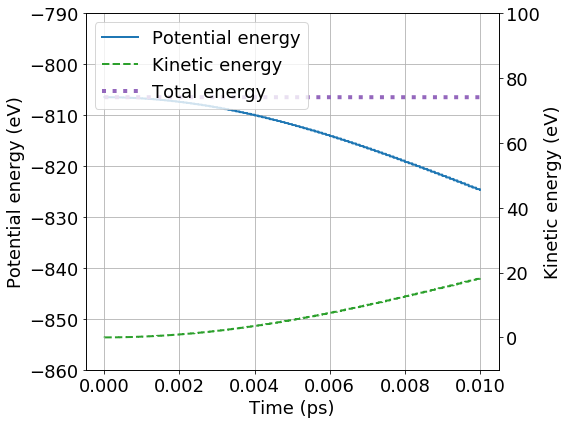

In [29]:
# Load energy data
data = np.loadtxt("datafiles/solid/vv_energies.dat")

# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ln1 = ax.plot(data[:,0], data[:,1], 'C0', linestyle='-', linewidth=2, label='Potential energy')
ax_twin = ax.twinx()
ln2 = ax_twin.plot(data[:,0], data[:,2], 'C2', linestyle='--', linewidth=2, label='Kinetic energy')
ln3 = ax.plot(data[:,0], data[:,3], 'C4', linestyle=':', linewidth=4, label='Total energy')
ax.set_xlabel(r'Time (ps)')
ax.set_ylabel('Potential energy (eV)')
ax_twin.set_ylabel('Kinetic energy (eV)')

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

ax.set_ylim(-860, -790)
ax_twin.set_ylim(-10, 100)


ax.grid()
# ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig('figures/en_noeq.png')

**A $\Delta t \leq 0.01$ was found to work well, with $\Delta t<0.005$ striking a good balance.**  

The temperature is given by the equipartition theorem as $<E_k> = \frac{1}{2}N k_B T \rightarrow T = \frac{2<E_k>}{N k_B}$.

In our units, the Boltzmann constant is given as: 

$$k_B = 1.3806 × 10^{-23} \text{ J/K} , \hspace{10px} \rightarrow k_B = 8.617 × 10^{-5} \text{ eV/K}.  $$

From the graph above, we identify the equlibriation phase to have ended at around 0.5 ps.

In [87]:
# Load energy data
data = np.loadtxt("datafiles/solid/vv_energies.dat")

# Constants
N = 256
kB = 8.617e-5

eq_iter = int(0.5/0.005)
print(f'Equlibration time is: {eq_iter*0.005} ps, with iteration number {eq_iter}.')


# Calculate average kinetic energy
avg_Ek = np.mean(data[eq_iter:,2])

print(f'The average temperature over all timesteps is: T={2*avg_Ek/(3*N*kB):.2f}')

Equlibration time is: 0.5 ps, with iteration number 100.
The average temperature over all timesteps is: T=770.83


# Task 3 - Equilibrate system - Solid

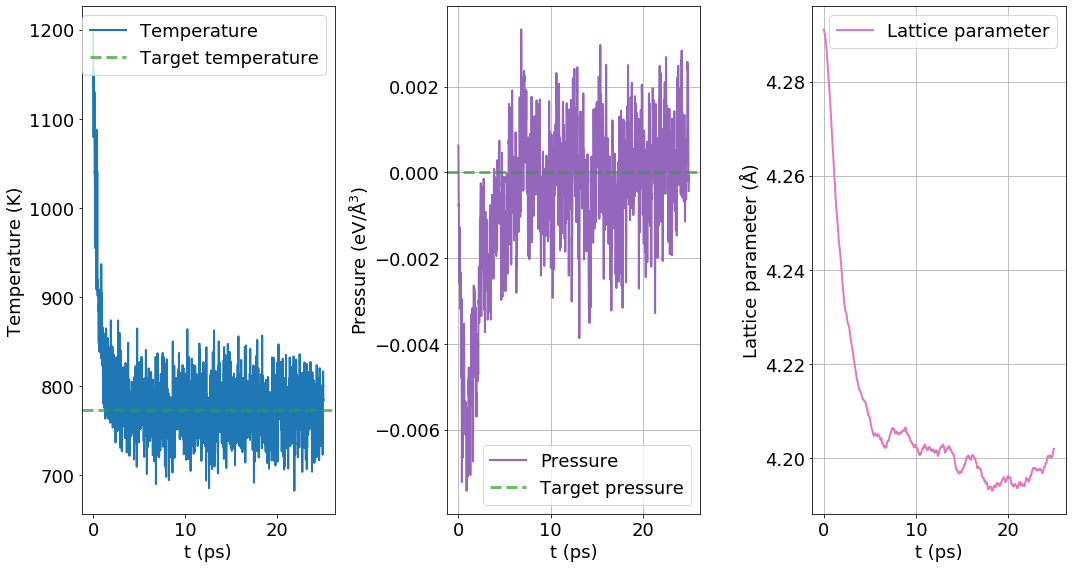

In [72]:
# Load energy data
data = np.loadtxt("datafiles/solid/equilibration.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(15,8))

# Plot
ax[0].plot(data[1:,0], data[1:,1], 'C0', linestyle='-', linewidth=2, label='Temperature')
ax[0].axhline(773.15, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Temperature (K)')
# ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[1:,0], data[1:,2], 'C4', linestyle='-', linewidth=2, label='Pressure')
ax[1].axhline(0, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target pressure')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Pressure (eV/Å$^3$)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[1:,0], data[1:,3], 'C6', linestyle='-', linewidth=2, label='Lattice parameter')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Lattice parameter (Å)')
ax[2].grid()
ax[2].legend(loc='best')

plt.tight_layout()

## *Solid* -  Plot production temperature, pressure and latice parameter

The average temperature over all timesteps is: T=770.59433214 K
The average pressure over all timesteps is: P=0.00001085 K


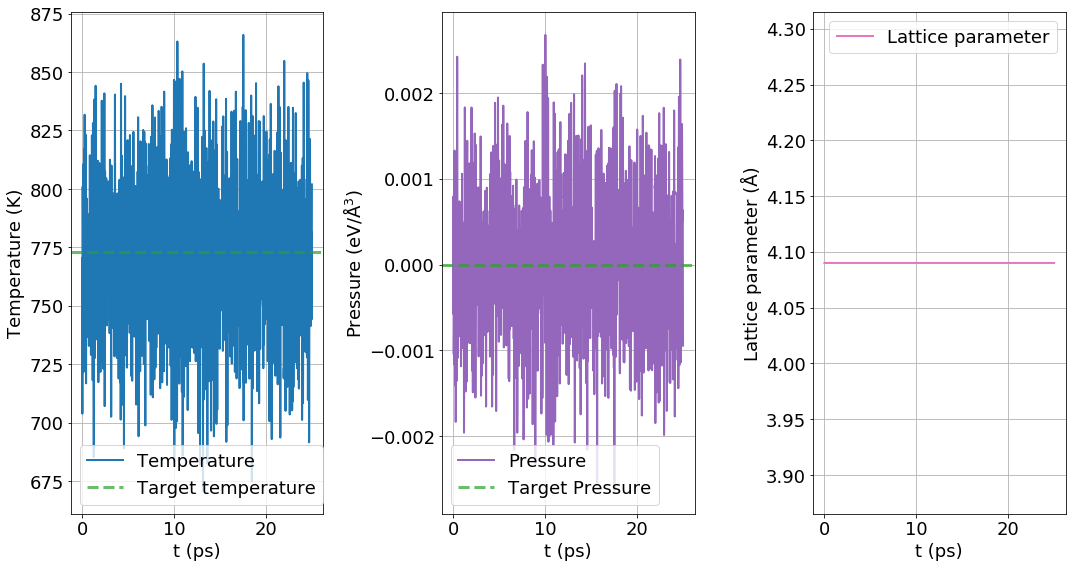

In [71]:
# Load energy data
data = np.loadtxt("datafiles/solid/temp_pres_lat.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(15,8))

# Plot
ax[0].plot(data[1:,0], data[1:,1], 'C0', linestyle='-', linewidth=2, label='Temperature')
ax[0].axhline(773.15, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Temperature (K)')
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[1:,0], data[1:,2], 'C4', linestyle='-', linewidth=2, label='Pressure')
ax[1].axhline(1.0 / 1.602 * 0.000001, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target Pressure')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Pressure (eV/Å$^3$)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[1:,0], data[1:,3], 'C6', linestyle='-', linewidth=2, label='Lattice parameter')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Lattice parameter (Å)')
ax[2].grid()
ax[2].legend(loc='best')
plt.tight_layout()

print(f'The average temperature over all timesteps is: T={np.mean(data[1:,1]):.8f} K')
print(f'The average pressure over all timesteps is: P={np.mean(data[1:,2]):.8f} K')

# Task 3 - Equilibrate system - Liquid

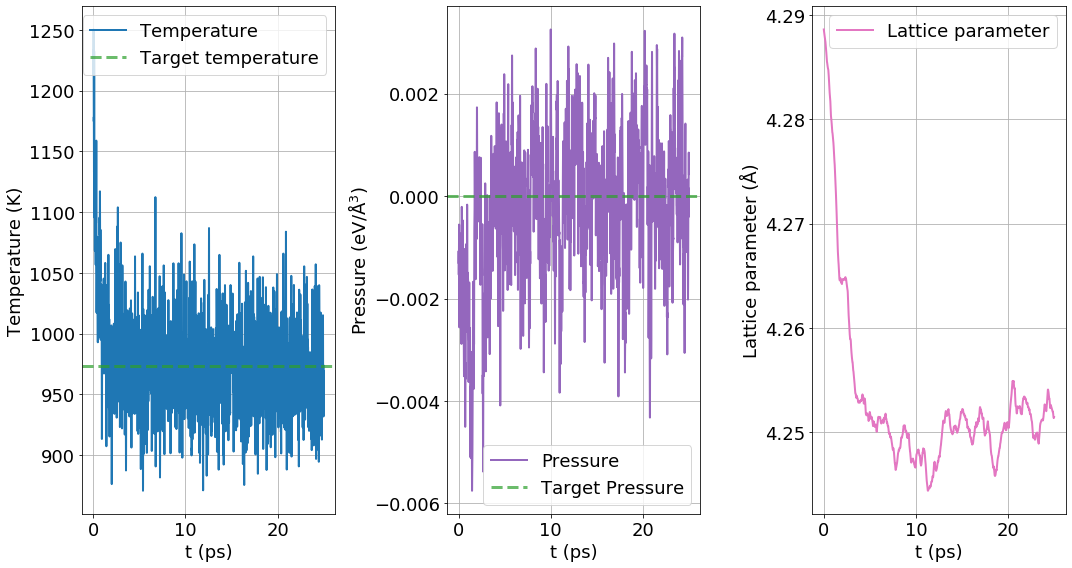

In [70]:
# Load energy data
data = np.loadtxt("datafiles/liquid/equilibration.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(15,8))

# Plot
ax[0].plot(data[1:,0], data[1:,1], 'C0', linestyle='-', linewidth=2, label='Temperature')
ax[0].axhline(973.15, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Temperature (K)')
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[1:,0], data[1:,2], 'C4', linestyle='-', linewidth=2, label='Pressure')
ax[1].axhline(1.0 / 1.602 * 0.000001, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target Pressure')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Pressure (eV/Å$^3$)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[1:,0], data[1:,3], 'C6', linestyle='-', linewidth=2, label='Lattice parameter')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Lattice parameter (Å)')
ax[2].grid()
ax[2].legend(loc='best')

plt.tight_layout()

## *Liquid* - Plot production temperature, pressure and latice parameter

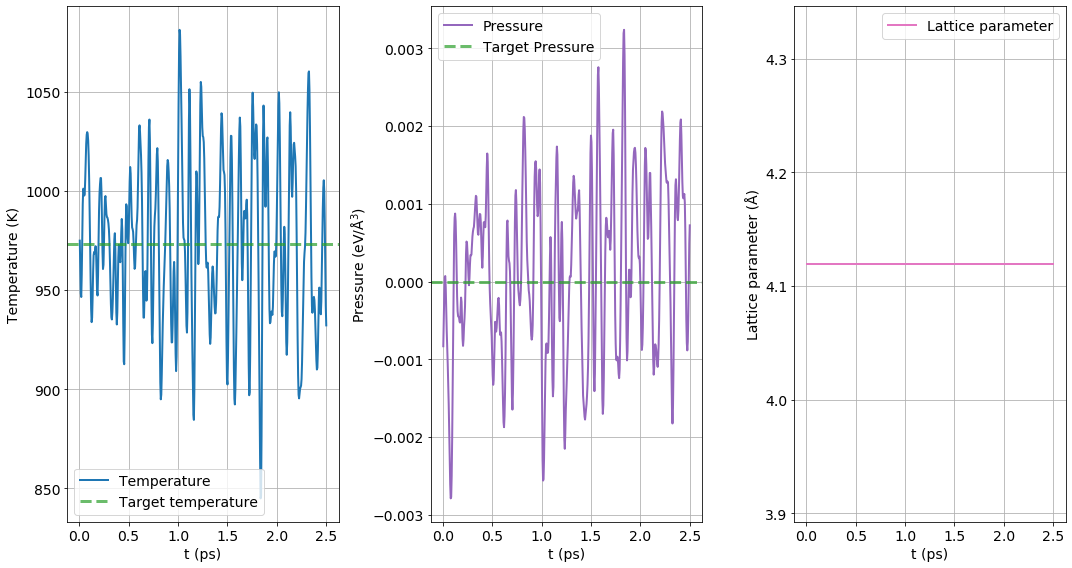

In [96]:
# Load energy data
data = np.loadtxt("datafiles/liquid/temp_pres_lat.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(15,8))

# Plot
ax[0].plot(data[1:,0], data[1:,1], 'C0', linestyle='-', linewidth=2, label='Temperature')
ax[0].axhline(973.15, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Temperature (K)')
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[1:,0], data[1:,2], 'C4', linestyle='-', linewidth=2, label='Pressure')
ax[1].axhline(0, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target Pressure')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Pressure (eV/Å$^3$)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[1:,0], data[1:,3], 'C6', linestyle='-', linewidth=2, label='Lattice parameter')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Lattice parameter (Å)')
ax[2].grid()
ax[2].legend(loc='best')

plt.tight_layout()

## Plot the components of one of the particles - *liquid*

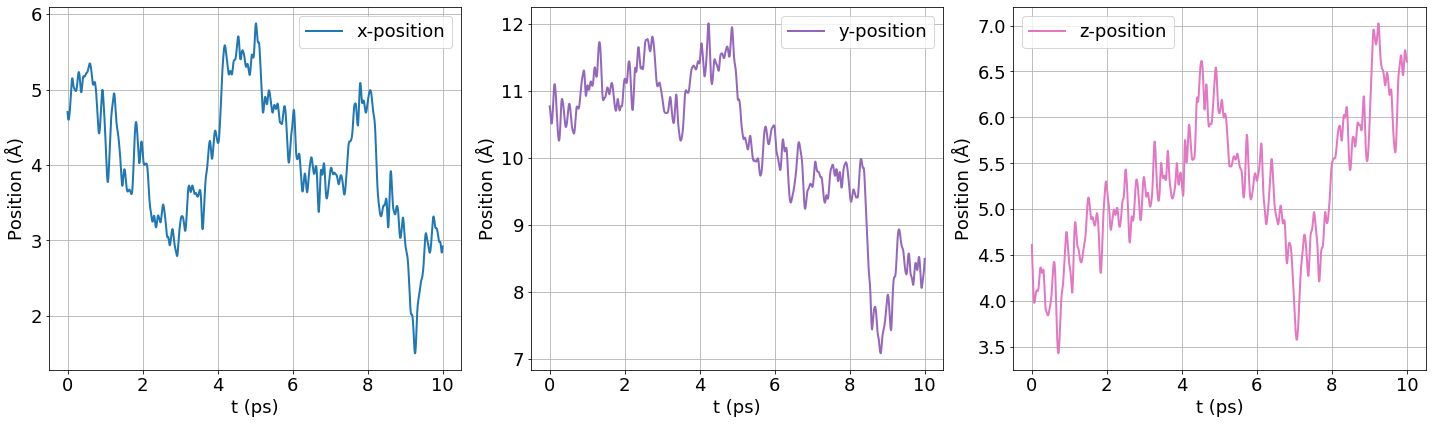

In [66]:
# Load energy data
data = np.loadtxt("datafiles/liquid/MSD.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(20,6))

# Plot
ax[0].plot(data[:,0], data[:,1], 'C0', linestyle='-', linewidth=2, label='x-position')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Position (Å)')
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[:,0], data[:,2], 'C4', linestyle='-', linewidth=2, label='y-position')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Position (Å)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[:,0], data[:,3], 'C6', linestyle='-', linewidth=2, label='z-position')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Position (Å)')
ax[2].grid()
ax[2].legend(loc='best')

plt.tight_layout()

## Plot the components of one of the particles - *solid*

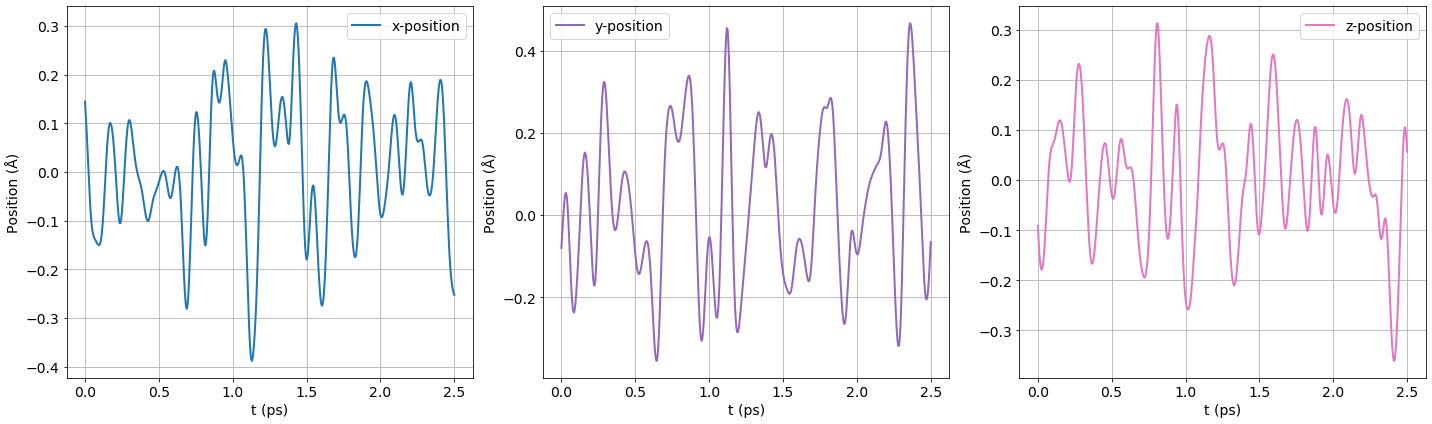

In [26]:
# Load energy data
data = np.loadtxt("datafiles/solid/MSD.dat")

# Define figure
fig, ax = plt.subplots(1,3, figsize=(20,6))

# Plot
ax[0].plot(data[:,0], data[:,1], 'C0', linestyle='-', linewidth=2, label='x-position')
ax[0].set_xlabel(r't (ps)')
ax[0].set_ylabel(r'Position (Å)')
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(data[:,0], data[:,2], 'C4', linestyle='-', linewidth=2, label='y-position')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[1].set_xlabel(r't (ps)')
ax[1].set_ylabel(r'Position (Å)')
ax[1].grid()
ax[1].legend(loc='best')

ax[2].plot(data[:,0], data[:,3], 'C6', linestyle='-', linewidth=2, label='z-position')
# ax[1].axhline(500, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Target temperature')
ax[2].set_xlabel(r't (ps)')
ax[2].set_ylabel(r'Position (Å)')
ax[2].grid()
ax[2].legend(loc='best')

plt.tight_layout()

# Task 5 - Mean squared displacement and transport coefficients

The self-diffusion coefficient can be calculated as: 

$$D_s = \lim_{t\rightarrow\infty} \frac{1}{6t} \Delta_{MSD}(t) $$.

The self-diffusion coefficient is only interesting in the liquid. We approximate this limit with the average of the last 100 timesteps of $\Delta_{MSD}(t)$ /////////// **Is this ok?** ///////////. 

The self-diffusion coefficient for the solid is Ds=0.000488 Å^2/ps
The self-diffusion coefficient for the liquid from the MSD is Ds=0.424542 Å^2/ps


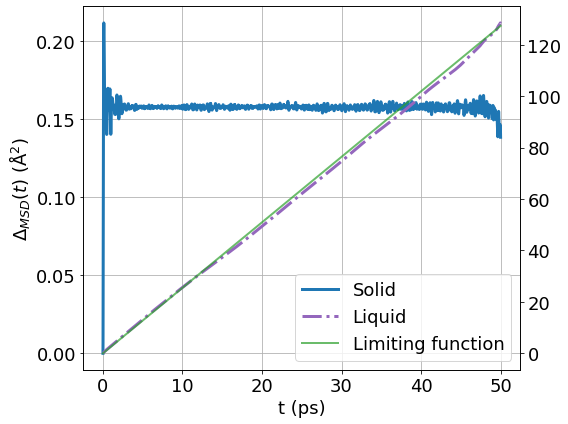

In [82]:
# Load energy data
data_s = np.loadtxt("datafiles/solid/MSD.dat")
data_l = np.loadtxt("datafiles/liquid/MSD.dat")

# Calculate the limiting value of Delta_MSD
lim_s = np.mean(data_s[-100:,4])
tlim_s = data_s[-1,0]  # Take the time as the last value

lim_l = np.mean(data_l[-100:,4])
tlim_l = data_l[-1,0]  # Take the time as the last value

# Calculate the self-transport coefficient
Ds_s = lim_s/(6*tlim_s)
Ds_l = lim_l/(6*tlim_l)

print(f'The self-diffusion coefficient for the solid is Ds={Ds_s:.6f} Å^2/ps')
print(f'The self-diffusion coefficient for the liquid from the MSD is Ds={Ds_l:.6f} Å^2/ps')

# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ln1 = ax.plot(data_s[:,0], data_s[:,4], 'C0', linestyle='-', linewidth=3, label='Solid')
ax_twin = ax.twinx()
# ax.plot(data[:,0], data[:,0]*Ds*6)
# ax.axhline(lim_s, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Solid, limiting value')

ln2 = ax_twin.plot(data_l[:,0], data_l[:,4], 'C4', linestyle='-.', linewidth=3, label='Liquid')
ln3 = ax_twin.plot(data_l[:,0], data_l[:,0]*Ds_l*6, 'C2', alpha=0.7, linewidth=2, label='Limiting function')
# ax.axhline(lim_l, c='C6', linestyle='--', linewidth=3, alpha=0.7, label='Liquid, limiting value')


ax.set_xlabel(r't (ps)')
ax.set_ylabel(r'$\Delta_{MSD}(t)$ (Å$^2$)')

ax.grid()
# ax.set_ylim(0,1.3)
# ax.set_xlim(0,0.5)

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='lower right')

plt.tight_layout()
plt.savefig('figures/MSD.png')

In [11]:
print(lim)
print(tlim)

0.167054
25.0


# Task 6 - Velocity correlation function

The self-diffusion coefficient in the liquid is given as (for the velocity function): 

$$ D_s = \frac{1}{3} \int_0^\infty d\tau \Phi(t).$$

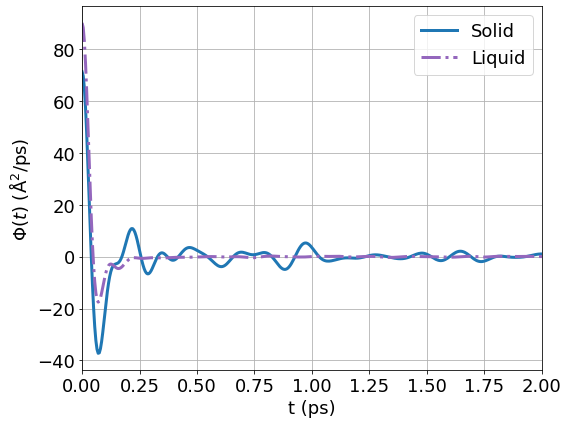

In [109]:
# Load energy data
data_s = np.loadtxt("datafiles/solid/vel_corr.dat")
data_l = np.loadtxt("datafiles/liquid/vel_corr.dat")

# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ax.plot(data_s[:,0], data_s[:,1], 'C0', linestyle='-', linewidth=3, label=r'Solid')
ax.plot(data_l[:,0], data_l[:,1], 'C4', linestyle='-.', linewidth=3, label=r'Liquid')
ax.set_xlabel(r't (ps)')
ax.set_ylabel(r'$\Phi(t)$ (Å$^2$/ps)')
ax.set_xlim(0,2)
ax.grid()
ax.legend(loc='best')
plt.tight_layout()
plt.savefig('figures/vel_corr.png')

0.42827258333333407
The self-diffusion coefficient for the liquid from the Velocity correlation is Ds=0.428273 Å^2/ps.


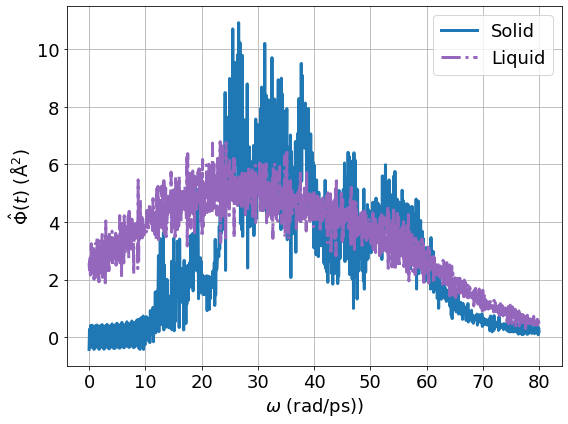

In [87]:
# Load energy data
data_s = np.loadtxt("datafiles/solid/vel_corr.dat")
data_l = np.loadtxt("datafiles/liquid/vel_corr.dat")

# Calculate self-diffusion coefficient
def pow_func(t, omega, phi):
    return phi*np.cos(omega*t)


omegas = np.linspace(0, 80, 1000)
spectrum_phi_s = np.zeros((len(omegas)))
spectrum_phi_l = np.zeros((len(omegas)))


for idx, omega in enumerate(omegas): 
    cos_vec_l = np.cos(omega*data_l[:,0])
    cos_vec_s = np.cos(omega*data_s[:,0])
    integrand_s = cos_vec_s * np.array(data_s[:,1])
    integrand_l = cos_vec_l * np.array(data_l[:,1])
    
    spectrum_phi_s[idx] = 2 * np.trapz(integrand_s, data_s[:,0])
    spectrum_phi_l[idx] = 2 * np.trapz(integrand_l, data_l[:,0])
    
    
# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ax.plot(omegas, spectrum_phi_s, 'C0', linestyle='-', linewidth=3, label=r'Solid')
ax.plot(omegas, spectrum_phi_l, 'C4', linestyle='-.', linewidth=3, label=r'Liquid')
ax.set_xlabel(r'$\omega$ (rad/ps))')
ax.set_ylabel(r'$\hat{\Phi}(t)$ (Å$^2$)')
# ax.set_xlim(0,1)
ax.grid()
# ax.set_ylim(0,1)
ax.legend(loc='best')


Ds_l2 = 1/3*np.trapz(data_l[:,1], data_l[:,0])
Ds_l = 1/6*spectrum_phi_l[0]
print(Ds_l2)
print(f'The self-diffusion coefficient for the liquid from the Velocity correlation is Ds={Ds_l:.6f} Å^2/ps.')
plt.tight_layout()
plt.savefig('figures/vel_corr_power.png')

# Task 7 - Fast correlation algorithm

We have sampled our quantity $A_k$ at $timesteps+1=M$ different timesteps. To get $h_k$ we pad it with $timesteps+1$ zeros, for a total of $N = 2M$ entries in vector that is to be Fourier transformed. 

Intriducing the correlation function:

$$ S_l = \sum_{k=0}^{N-1} h_{l+k} h_k^* = (M-|l|)C_l, $$

and using the circular correlation theorem we have:

$$ S_l = \frac{1}{N} \sum_{n=0}^{N-1} |H_n|^2 e^{2\pi iln/N}.$$

$H_n$ is the inverse discrete fourier transform of $h_k$. 


First, FFT($h_k$) => $H_n$ 

Second, plot power spectrum $H_n$

Third, use Fast Correlation Algorithm to get correlation function.



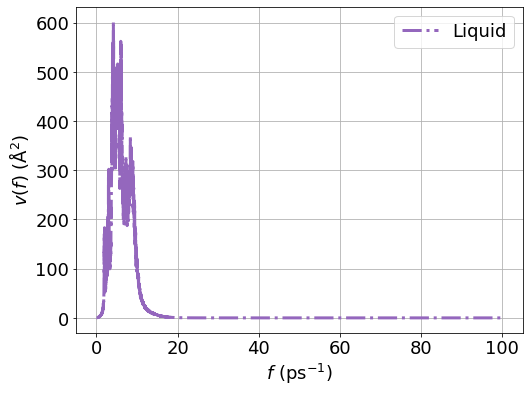

In [85]:
# Plot the ensemble average of the power spectrum

# Load energy data
# data_s = np.loadtxt("datafiles/solid/vel_powspec.dat")
data_l = np.loadtxt("datafiles/solid/vel_powspec.dat") 

# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
# ax.plot(data_s[:,0], data_s[:,1]/data_s[0,1], 'C0', linestyle='-', linewidth=3, label=r'Solid')
ax.plot(data_l[5:,0], data_l[5:,1], 'C4', linestyle='-.', linewidth=3, label=r'Liquid')
ax.set_xlabel(r'$f$ (ps$^{-1}$)')
ax.set_ylabel(r'$v(f)$ (Å$^2$)')
ax.grid()
ax.legend(loc='best')

Plot velocity correlation function as obtained from Fast Correlation Algorithm

(10001, 3)


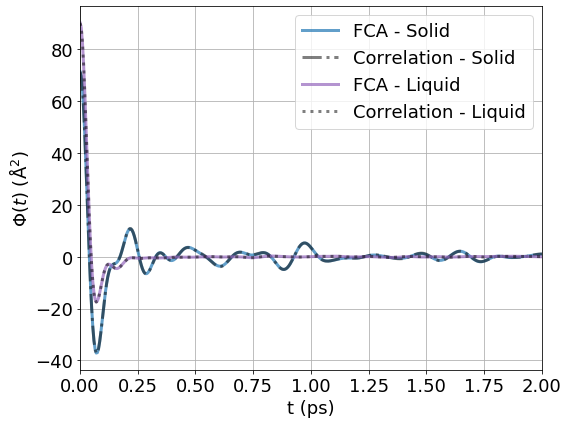

In [108]:
# Load data
data_s_fast = np.loadtxt("datafiles/solid/vel_powspec.dat")
data_s_corr = np.loadtxt("datafiles/solid/vel_corr.dat")

data_l_fast = np.loadtxt("datafiles/liquid/vel_powspec.dat")
data_l_corr = np.loadtxt("datafiles/liquid/vel_corr.dat")

# Define figure
fig, ax = plt.subplots(figsize=(8,6))

# Plot
ax.plot(data_s_corr[:,0], data_s_fast[:,2]*3, 'C0', linestyle='-', alpha=0.7, linewidth=3, label=r'FCA - Solid')
ax.plot(data_s_corr[:,0], data_s_corr[:,1], 'k', linestyle='-.', alpha=0.5, linewidth=3, label=r'Correlation - Solid')

ax.plot(data_l_corr[:,0], data_l_fast[:,2]*3, 'C4', linestyle='-',  alpha=0.7, linewidth=3, label=r'FCA - Liquid')
ax.plot(data_l_corr[:,0], data_l_corr[:,1], 'k', linestyle=':', alpha=0.5, linewidth=3, label=r'Correlation - Liquid')

ax.set_xlabel(r't (ps)')
ax.set_ylabel(r'$\Phi(t)$ (Å$^2$)')
ax.set_xlim(0,2)
ax.grid()
ax.legend(loc='best')

print(data_s_fast.shape)
plt.tight_layout()
plt.savefig('figures/fast_corr_alg.png')
# print(data_s_corr[:,1])